## GDP of Japan

In [1]:
import json 
import pandas as pd 
import numpy as np 
import math 
import itertools 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure 
from load_dataset import TimeSeries 

In [2]:
annotations = pd.read_json('TCPD-master/annotations.json')
annotations[['gdp_japan']]

,gdp_japan
6,[]
7,[]
8,[]
9,[32]
10,NaN
12,[32]
13,NaN
14,NaN


In [3]:
annotator_df = pd.read_json('TCPD-master/annotations.json') 
gdp_japan_df = annotator_df[['gdp_japan']] 
list2d = np.array(gdp_japan_df).flatten() 
list2d = [l for l in list2d if (type(l)==list)] 
gdp_japan_annotation_lst = list(itertools.chain.from_iterable(list2d))
gdp_japan_annotation_lst

[32, 32]

In [7]:
gdp_japan_df = gdp_japan_df[['date', 'V1']]
gdp_japan_df

,date,V1
0,1960,1.595064e+13
1,1961,1.926310e+13
2,1962,2.186029e+13
3,1963,2.501933e+13
4,1964,2.942964e+13
5,1965,3.274210e+13
6,1966,3.802611e+13
7,1967,4.456148e+13
8,1968,5.277639e+13
9,1969,6.199351e+13


### Plot the true changepoint (1992)

t         int64
V1      float64
date     object
dtype: object


<Figure size 960x480 with 0 Axes>

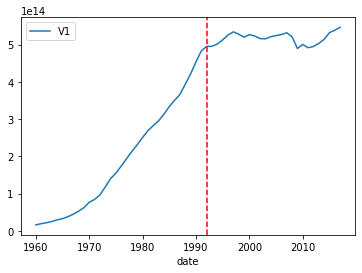

In [9]:
from load_dataset import TimeSeries
ts = TimeSeries.from_json('TCPD-master/datasets/gdp_japan/gdp_japan.json')
gdp_japan_df = ts.df
gdp_japan_df['date'] =ts.datestr
print(gdp_japan_df.dtypes)
figure(figsize=(12, 6), dpi=80)
gdp_japan_df.plot('date', 'V1')
gdp_japan_df['is_CPD'] = np.where(gdp_japan_df.t.isin(gdp_japan_annotation_lst), 1,0)
plt.axvline(gdp_japan_df.loc[gdp_japan_df['is_CPD']==1][['t']].values[0], color='red', linestyle='--')

### BOCPD Model

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ax/core/parameter.py:467: UserWarning:

`sort_values` is not specified for `ChoiceParameter` "known_prec_multiplier". Defaulting to `True` for parameters of `ParameterType` FLOAT. To override this behavior (or avoid this warning), specify `sort_values` during `ChoiceParameter` construction.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ax/core/parameter.py:467: UserWarning:

`sort_values` is not specified for `ChoiceParameter` "cp_prior". Defaulting to `True` for parameters of `ParameterType` FLOAT. To override this behavior (or avoid this warning), specify `sort_values` during `ChoiceParameter` construction.



total changepoints-->  2


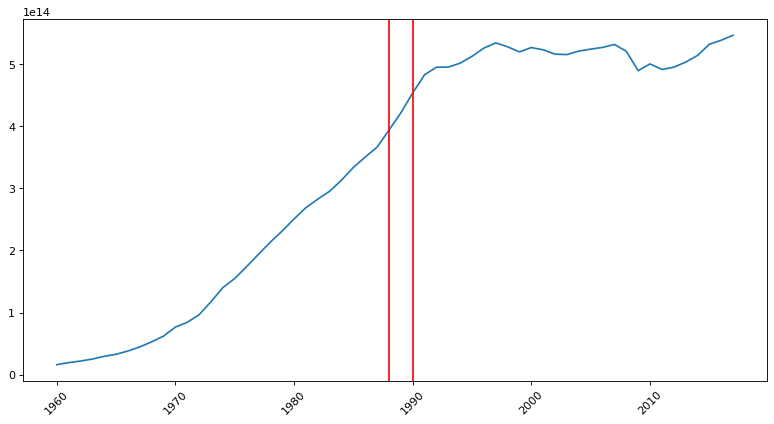

In [23]:
from kats.detectors.bocpd import BOCPDetector, BOCPDModelType, TrendChangeParameters
from kats.consts import TimeSeriesData

df = gdp_japan_df
df['time']= pd.to_datetime(df['date'])


tsd = TimeSeriesData(df.loc[:,['time','V1']])

# Initialize the detector
detector = BOCPDetector(tsd)


changepoints = detector.detector(
    model=BOCPDModelType.NORMAL_KNOWN_MODEL, # this is the default choice
    #model_parameters=[known_prec_multiplier=1.0]
    lag=5,
    changepoint_prior=.9,#prior belief
    threshold=.5
)

print('total changepoints--> ', len(changepoints))

figure(figsize=(12, 6), dpi=80)
# Plot the data
plt.xticks(rotation=45)
detector.plot(changepoints)
plt.show()

In [20]:
changepoints

[(TimeSeriesChangePoint(start_time: 1988-01-01T00:00:00.000000000, end_time: 1988-01-01T00:00:00.000000000, confidence: 0.5016099167623518),
  <kats.detectors.bocpd.BOCPDMetadata at 0x7ff674507c10>),
 (TimeSeriesChangePoint(start_time: 1990-01-01T00:00:00.000000000, end_time: 1990-01-01T00:00:00.000000000, confidence: 0.5672636337981058),
  <kats.detectors.bocpd.BOCPDMetadata at 0x7ff674507eb0>)]

### Robust Stat Detector Model

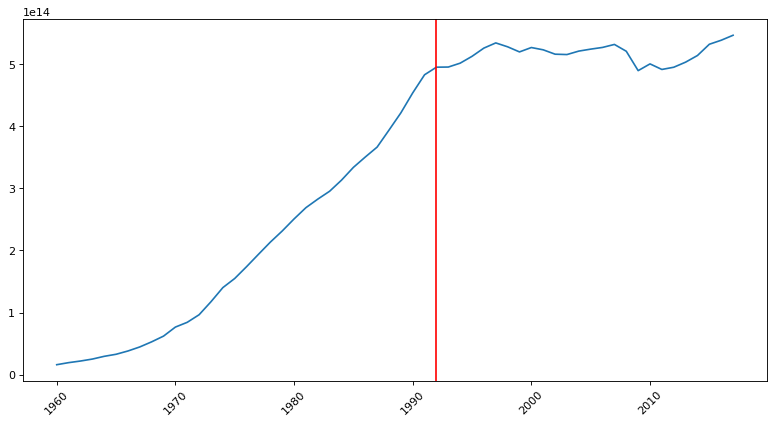

In [37]:
from kats.detectors.robust_stat_detection import RobustStatDetector

detector = RobustStatDetector(tsd)
change_points = detector.detector(comparison_window=5, smoothing_window_size=5, p_value_cutoff=0.05)
figure(figsize=(12, 6), dpi=80)
plt.xticks(rotation=45)
detector.plot(change_points)
plt.show()

In [38]:
change_points

[(TimeSeriesChangePoint(start_time: 1992-01-01T00:00:00.000000000, end_time: 1992-01-01T00:00:00.000000000, confidence: 0.9581645425913177),
  <kats.detectors.robust_stat_detection.RobustStatMetadata at 0x7ff675a60250>)]

### CUSUM Model

total changepoints-->  1


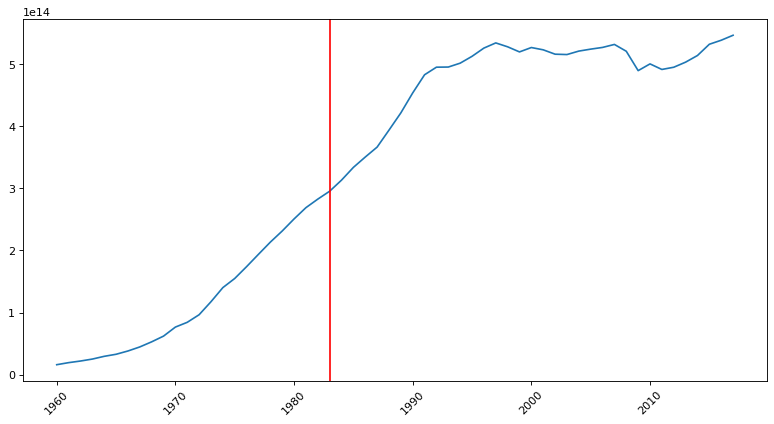

In [47]:
from kats.detectors.cusum_detection import CUSUMDetector


# Initialize the detector
detector = CUSUMDetector(tsd)

change_points = detector.detector(threshold=0.05)

print('total changepoints--> ', len(change_points))

figure(figsize=(12, 6), dpi=80)
# Plot the data
plt.xticks(rotation=45)
detector.plot(change_points)
plt.show()

In [43]:
change_points

[(TimeSeriesChangePoint(start_time: 1983-01-01 00:00:00, end_time: 1983-01-01 00:00:00, confidence: 1.0),
  <kats.detectors.cusum_detection.CUSUMMetadata at 0x7ff675a4f220>)]

#### Annotation -> 1992
#### BOCPD -> 1992
#### RobustStatDetector -> 1992
#### CUSUM -> 1983